Detectors d'objectes

https://www.datacamp.com/community/tutorials/object-detection-guide

molt bon tutorial:

https://github.com/sgrvinod/a-PyTorch-Tutorial-to-Object-Detection

Historia de detectors objectes amb deep learning:

https://www.learnopencv.com/faster-r-cnn-object-detection-with-pytorch/


Conceptes:

receptive fields: https://medium.com/mlreview/a-guide-to-receptive-field-arithmetic-for-convolutional-neural-networks-e0f514068807

jacquard index: https://github.com/sgrvinod/a-PyTorch-Tutorial-to-Object-Detection#jaccard-index


Comparativa de:

- Sliding window

2 fases: proposta de finestres i classifiació
- R-CNN

- Fast R-CNN

- Faster R-CNN

1 fase: proposta es constant

- SSD i la millora RetinaNET (Focal Loss): https://towardsdatascience.com/neural-networks-intuitions-3-focal-loss-for-dense-object-detection-paper-explanation-61bc0205114e

https://towardsdatascience.com/review-retinanet-focal-loss-object-detection-38fba6afabe4

<img src="Imatges/retinanet_comparison.png">

- YOLOv3:

Comparativa de detectors objectes (sense YOLO):

## Molt bona explicació de detecció d'objectes en 3 posts de medium:

https://medium.com/@jonathan_hui/what-do-we-learn-from-region-based-object-detectors-faster-r-cnn-r-fcn-fpn-7e354377a7c9







#Exercicis

Demanar imatges de cares d'alumnes etiquetades


# Exercici resolt: Detecció d'objectes amb FASTER R-CNN

In [22]:
import torchvision
from PIL import Image
import torch
from torchvision import transforms
import cv2
import matplotlib.pyplot as plt

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

def get_prediction(img_path, threshold):
    """
    funcio per a detectar objectes en una imatge
    """
    img = Image.open(img_path)
    
    # Defing PyTorch Transform
    transform = transforms.Compose(
        [transforms.ToTensor()])
    # Apply the transform to the image
    img = transform(img) 
    # Pass the image to the model
    pred = model([img])
    # Get the Prediction Score
    pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
    # Bounding boxes
    pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())] 
    pred_score = list(pred[0]['scores'].detach().numpy())
    # Get list of index with score greater than threshold.
    pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1] 
    pred_boxes = pred_boxes[:pred_t+1]
    pred_class = pred_class[:pred_t+1]
    return pred_boxes, pred_class

def object_detection(img_path, threshold=0.5, rect_th=3, text_size=3, text_th=3):
    # Get predictions
    boxes, pred_cls = get_prediction(img_path, threshold) 
    # Read image with cv2
    img = cv2.imread(img_path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for i in range(len(boxes)):
        # Draw Rectangle with the coordinates
        cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th) 
        # Write the prediction class
        cv2.putText(img,pred_cls[i], boxes[i][0],  cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th) 
    plt.figure(figsize=(20,30)) # display the output image
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()



In [ ]:
object_detection_api('./Imatges/people.jpg', threshold=0.8)

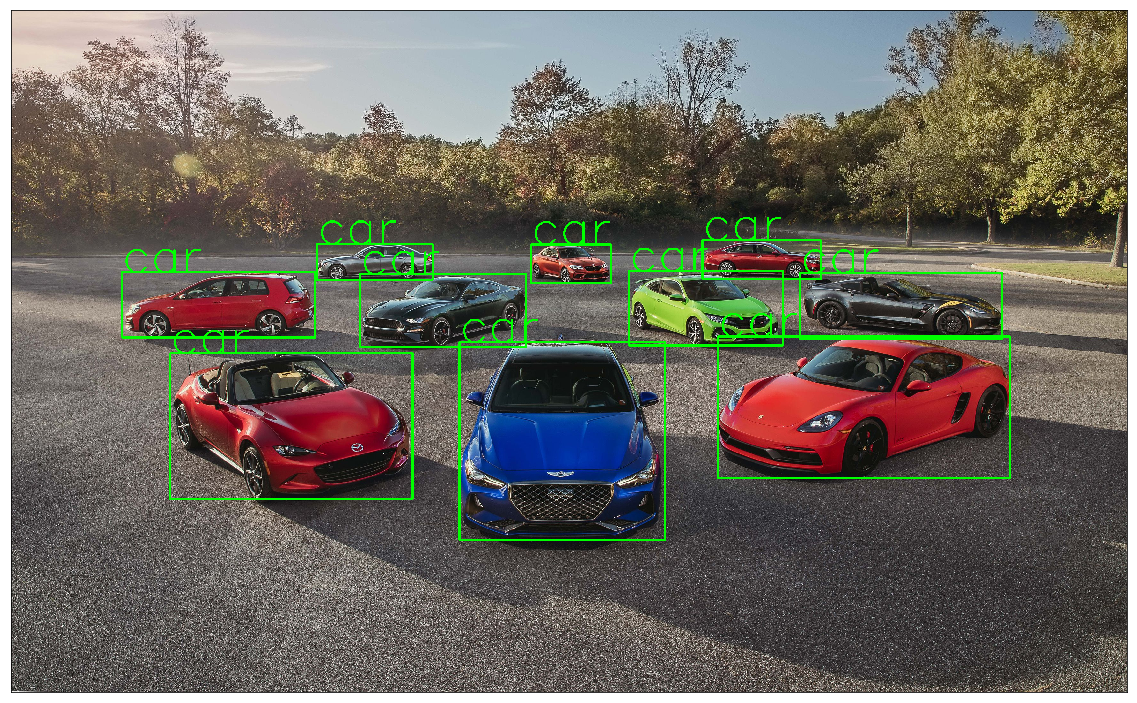

In [23]:
object_detection_api('./Imatges/car.jpg', rect_th=6, text_th=5, text_size=5)

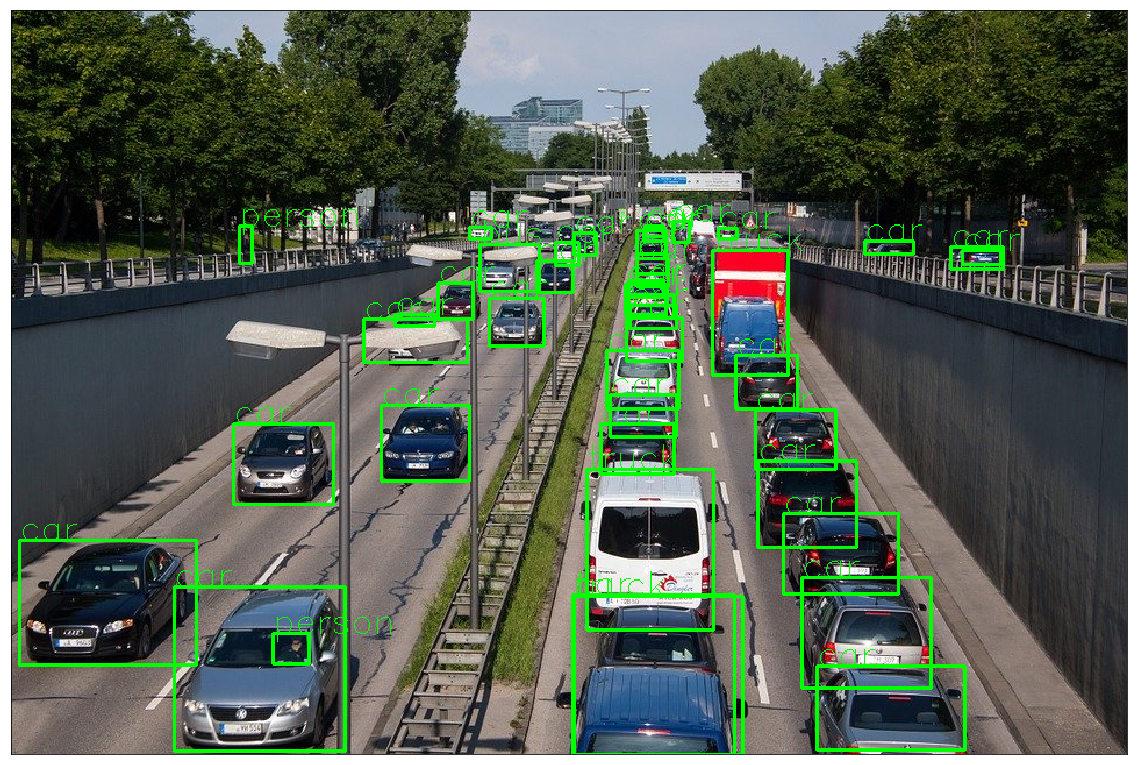

In [25]:
object_detection_api('./Imatges/traffic.jpg', rect_th=2, text_th=1, text_size=1)

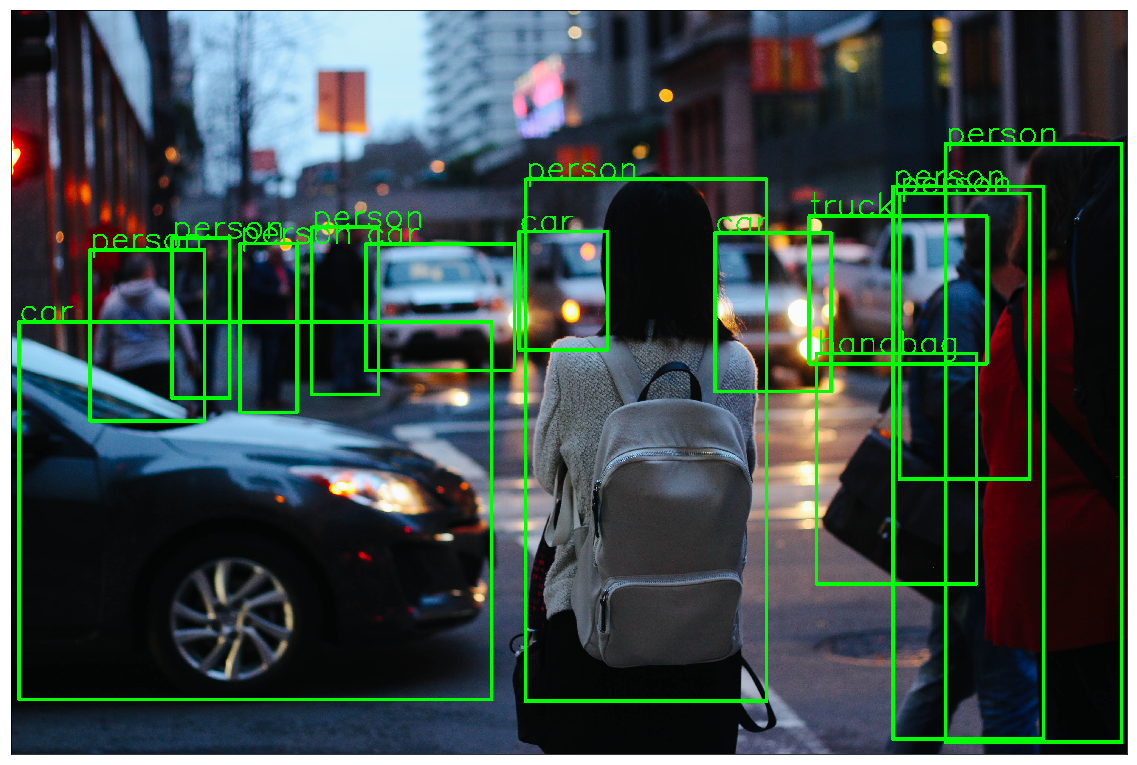

In [27]:
object_detection_api('./Imatges/girl_cars.jpg', rect_th=15, text_th=7, text_size=5, threshold=0.8)  

# Exercici 2: YOLO

Fer servir YOLO per a detecció d'objectes en les imatges anteriors

Implementació: https://github.com/eriklindernoren/PyTorch-YOLOv3

Adaptar el codi de detecció per a que funcioni en Notebooks


# Exercici 3: Transfer learning amb YOLO [Opcional]
    
Entrenar un detector de gats a partir de l'algoritme anterior
